In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
path=r'C:\Users\user\Downloads\Employee_data.csv'
df=pd.read_csv(path)

<h2> Exploratory Data Analysis </h2>

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h1> Correlation Analysis </h1>

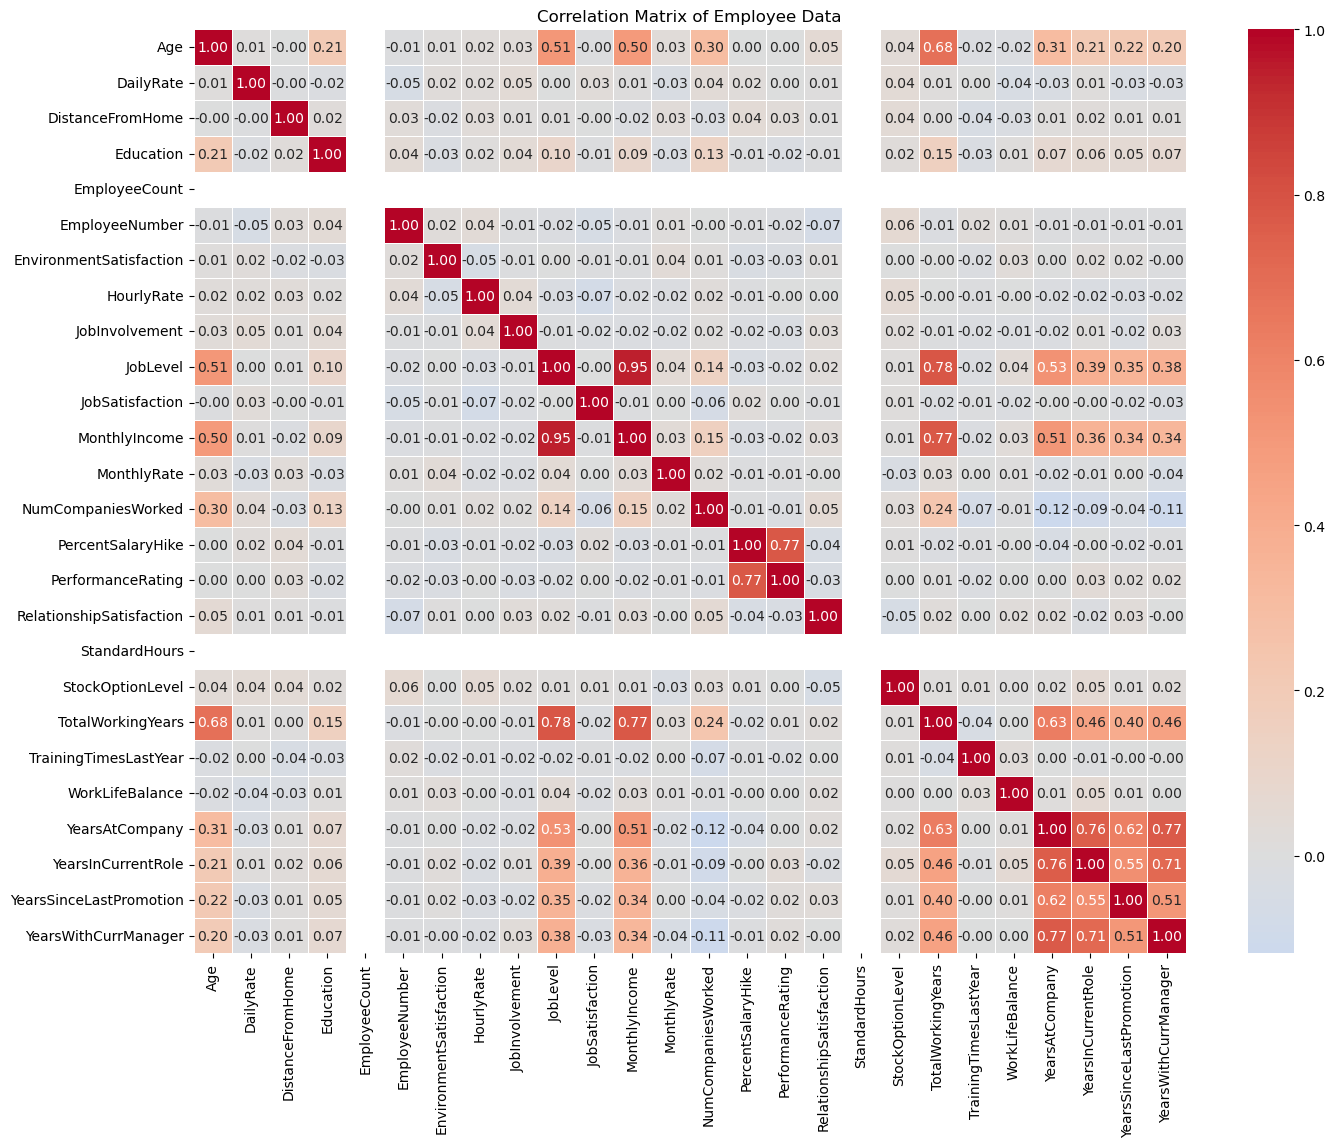

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Employee Data')
plt.show()

<h1> Attrition Analysis </h1>
This is the departure of employees from an organization either Voluntarily e.g resignation or involuntarily e.g by death

In [74]:
# Calculate overall attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate:")
print(attrition_rate)

Overall Attrition Rate:
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


(array([], dtype=float64), [])

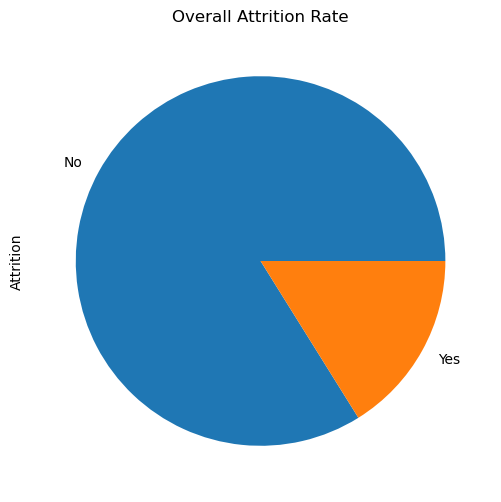

In [75]:
attrition_rate.plot(kind='pie', title='Overall Attrition Rate',
                   figsize=(10,6))
plt.xticks(rotation=0)

In [9]:
# Attrition rate by age
attrition_by_age = df.groupby('Age')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Age:")
print(attrition_by_age)


Attrition Rate by Age:
Attrition          No        Yes
Age                             
18          50.000000  50.000000
19          33.333333  66.666667
20          45.454545  54.545455
21          53.846154  46.153846
22          68.750000  31.250000
23          71.428571  28.571429
24          73.076923  26.923077
25          76.923077  23.076923
26          69.230769  30.769231
27          93.750000   6.250000
28          70.833333  29.166667
29          73.529412  26.470588
30          85.000000  15.000000
31          73.913043  26.086957
32          81.967213  18.032787
33          79.310345  20.689655
34          88.311688  11.688312
35          87.179487  12.820513
36          91.304348   8.695652
37          88.000000  12.000000
38          96.551724   3.448276
39          85.714286  14.285714
40          91.228070   8.771930
41          85.000000  15.000000
42          95.652174   4.347826
43          93.750000   6.250000
44          81.818182  18.181818
45          95.12195

<Axes: title={'center': 'Attrition by Age'}, xlabel='Age of Employee', ylabel='Attrition Percentage'>

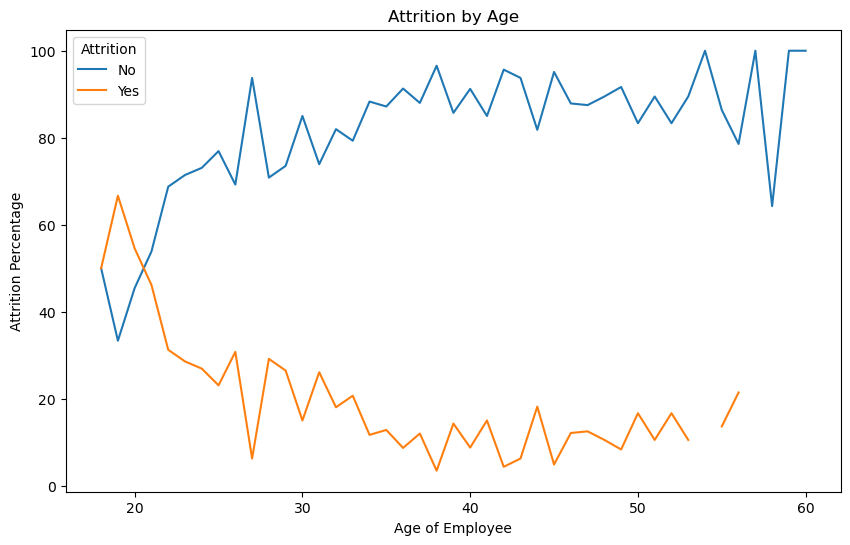

In [31]:
attrition_by_age.plot(kind='line', title='Attrition by Age',ylabel='Attrition Percentage',
                      xlabel='Age of Employee', figsize=(10,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55'),
  Text(38, 0, 

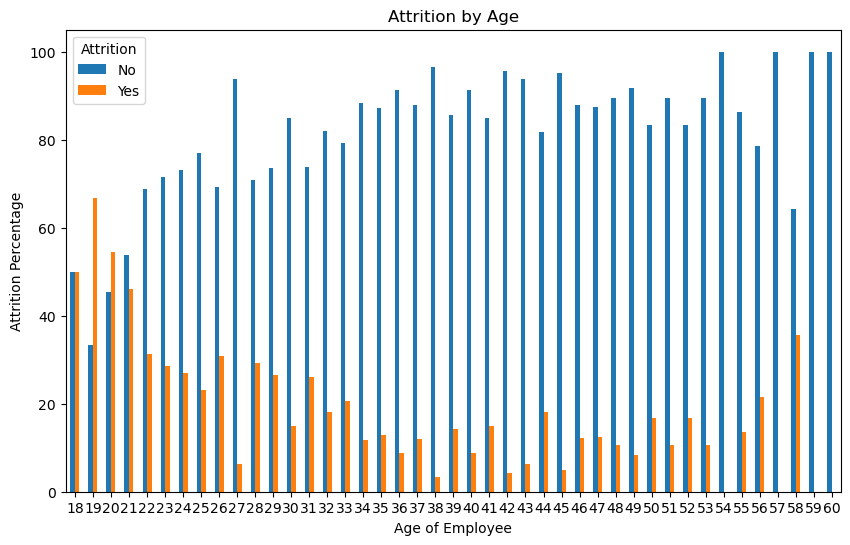

In [41]:
attrition_by_age.plot(kind='bar', title='Attrition by Age',ylabel='Attrition Percentage',
                      xlabel='Age of Employee', figsize=(10,6))
plt.xticks(rotation=0)

In [70]:
# Attrition rate by department
attrition_by_department = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Department:")
print(attrition_by_department)

Attrition Rate by Department:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

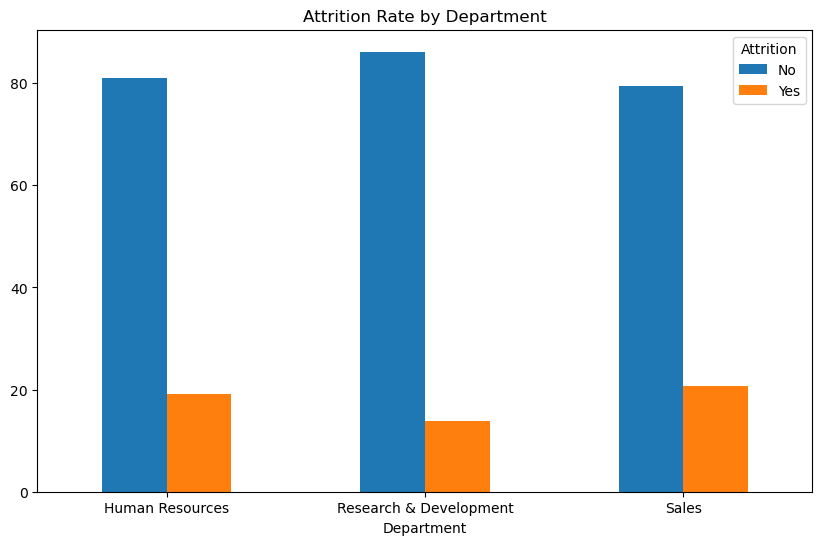

In [72]:
attrition_by_department.plot(kind='bar', title='Attrition Rate by Department', figsize=(10,6))
plt.xticks(rotation=0)

In [65]:
# Attrition rate by job role
attrition_by_job_role = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Job Role:")
print(attrition_by_job_role)

Attrition Rate by Job Role:
Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

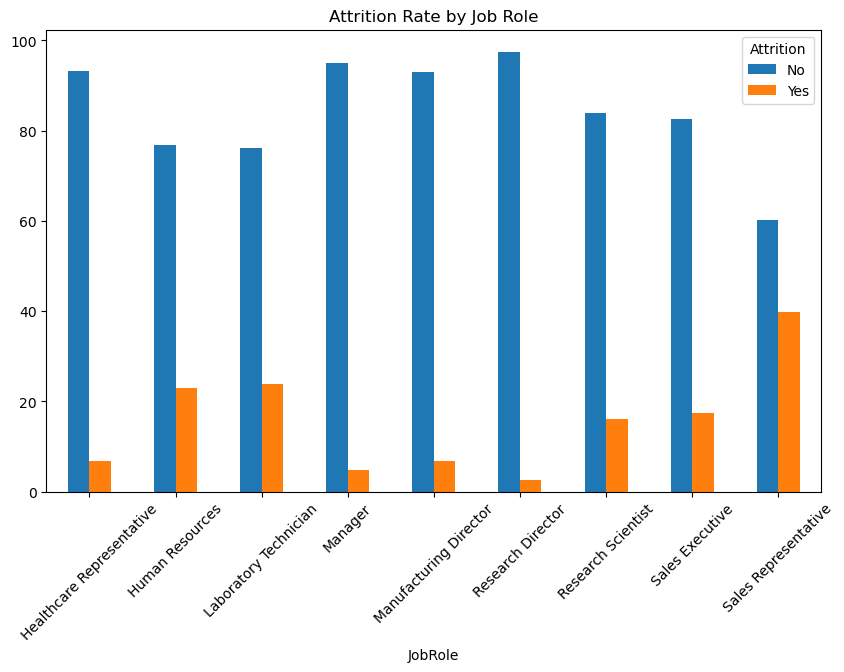

In [67]:
attrition_by_job_role.plot(kind='bar', title='Attrition Rate by Job Role', figsize=(10,6))
plt.xticks(rotation=45)

In [20]:
# Attrition rate by gender
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Gender:")
print(attrition_by_gender)

Attrition Rate by Gender:
Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


In [22]:
# Attrition rate by education field
attrition_by_education_field = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Education Field:")
print(attrition_by_education_field)

Attrition Rate by Education Field:
Attrition                No        Yes
EducationField                        
Human Resources   74.074074  25.925926
Life Sciences     85.313531  14.686469
Marketing         77.987421  22.012579
Medical           86.422414  13.577586
Other             86.585366  13.414634
Technical Degree  75.757576  24.242424


In [24]:
# Attrition rate by distance from home
attrition_by_distance = df.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Distance From Home:")
print(attrition_by_distance)

Attrition Rate by Distance From Home:
Attrition                No        Yes
DistanceFromHome                      
1                 87.500000  12.500000
2                 86.729858  13.270142
3                 83.333333  16.666667
4                 85.937500  14.062500
5                 84.615385  15.384615
6                 88.135593  11.864407
7                 86.904762  13.095238
8                 87.500000  12.500000
9                 78.823529  21.176471
10                87.209302  12.790698
11                86.206897  13.793103
12                70.000000  30.000000
13                68.421053  31.578947
14                80.952381  19.047619
15                80.769231  19.230769
16                78.125000  21.875000
17                75.000000  25.000000
18                84.615385  15.384615
19                86.363636  13.636364
20                84.000000  16.000000
21                83.333333  16.666667
22                68.421053  31.578947
23                81.48148

In [26]:
# Attrition rate by job satisfaction
attrition_by_job_satisfaction = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Job Satisfaction:")
print(attrition_by_job_satisfaction)

Attrition Rate by Job Satisfaction:
Attrition               No        Yes
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


In [27]:
# Attrition rate by work-life balance
attrition_by_work_life_balance = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Work-Life Balance:")
print(attrition_by_work_life_balance)

Attrition Rate by Work-Life Balance:
Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


<h1> Employee Demography Analysis </h1>

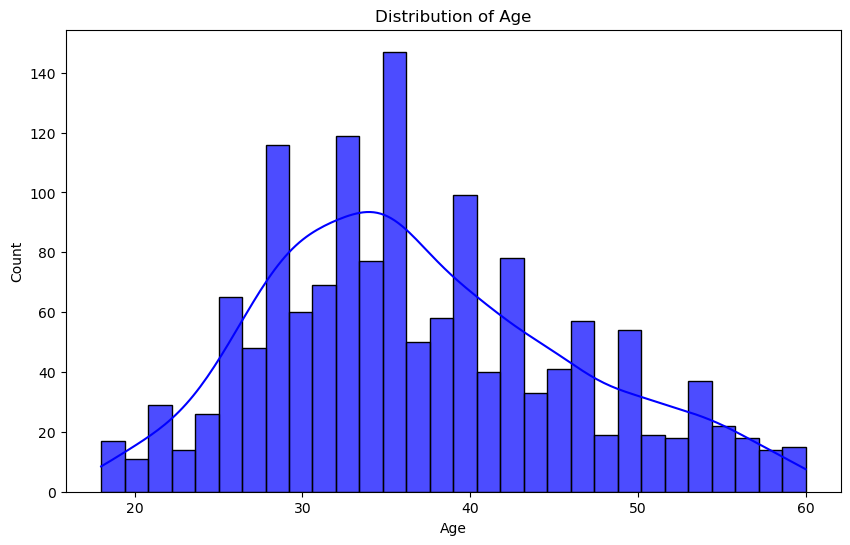

In [43]:
# Example: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Male      882
Female    588
Name: Gender, dtype: int64


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

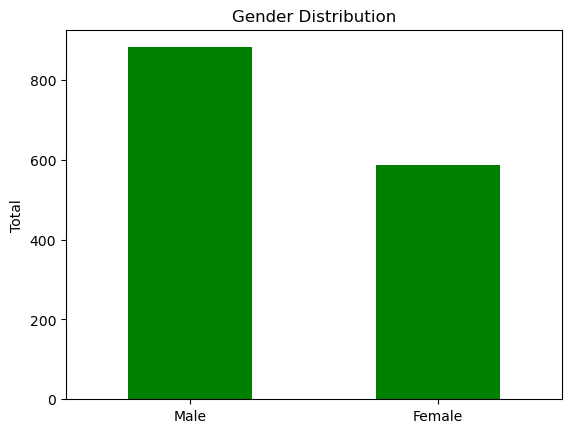

In [65]:
# Gender distribution
gender=df['Gender'].value_counts()
print(gender)
gender.plot(kind='bar', title='Gender Distribution', color='green', ylabel='Total')
plt.xticks(rotation=0)

MaritalStatus   Divorced    Married     Single
Gender                                        
Female         19.897959  46.258503  33.843537
Male           23.809524  45.464853  30.725624


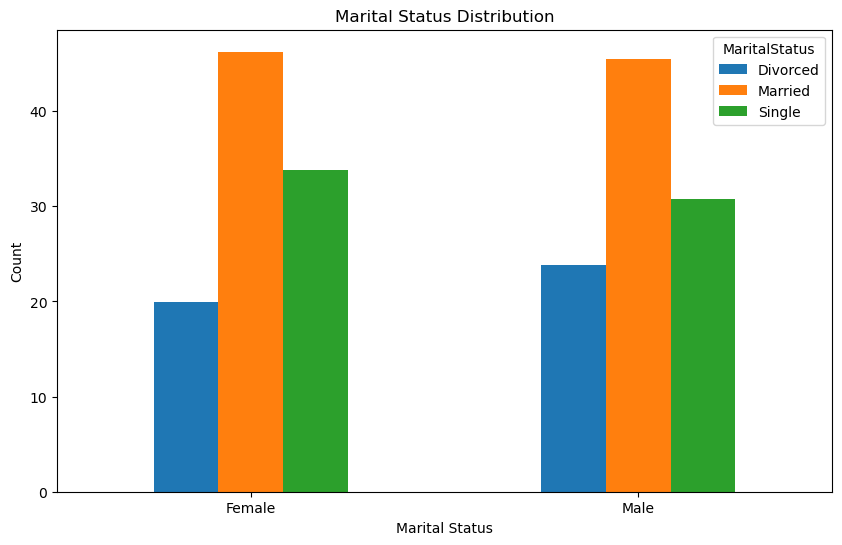

In [72]:
marital_distribution = df.groupby('Gender')['MaritalStatus'].value_counts(normalize=True).unstack() * 100
print(marital_distribution)
marital_distribution.plot(kind='bar', figsize=(10,6))
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

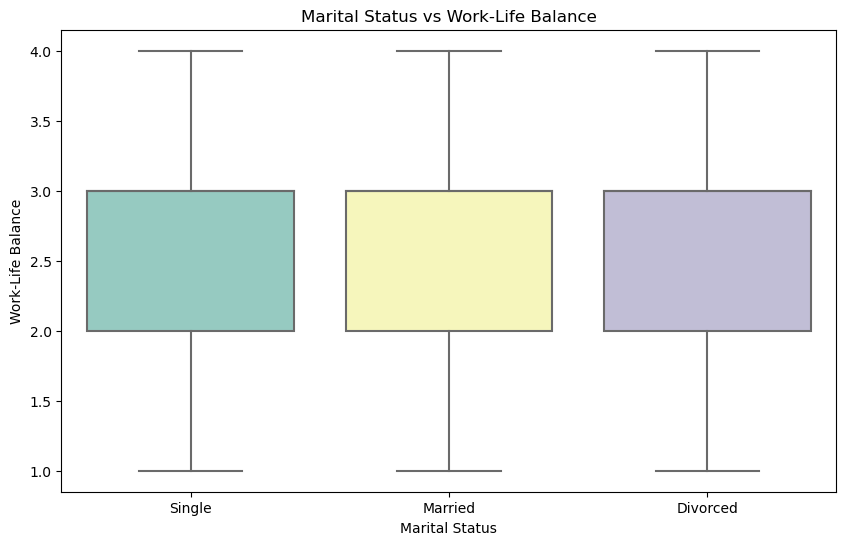

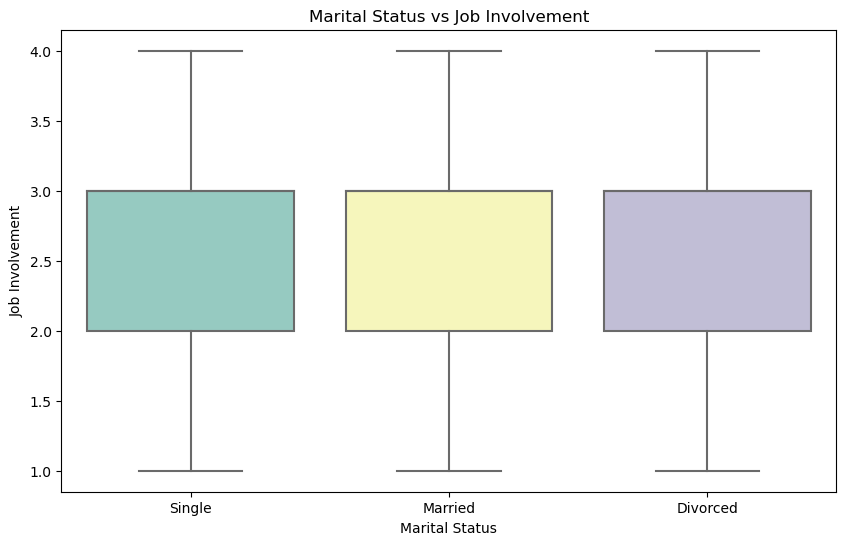

In [76]:
# Marital status vs work-life balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='WorkLifeBalance', data=df, palette='Set3')
plt.title('Marital Status vs Work-Life Balance')
plt.xlabel('Marital Status')
plt.ylabel('Work-Life Balance')
plt.show()

# Marital status vs job involvement
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='JobInvolvement', data=df, palette='Set3')
plt.title('Marital Status vs Job Involvement')
plt.xlabel('Marital Status')
plt.ylabel('Job Involvement')
plt.show()


- The similar range and distribution of work-life balance and job involvement ratings suggest that employees, regardless of their marital status, tend to have similar experiences and perceptions in these areas.

- 

In [78]:
from scipy import stats

# ANOVA test for Work-Life Balance across Marital Status
anova_wlb = stats.f_oneway(df[df['MaritalStatus'] == 'Single']['WorkLifeBalance'],
                           df[df['MaritalStatus'] == 'Married']['WorkLifeBalance'],
                           df[df['MaritalStatus'] == 'Divorced']['WorkLifeBalance'])
print('ANOVA test for Work-Life Balance:', anova_wlb)

# ANOVA test for Job Involvement across Marital Status
anova_ji = stats.f_oneway(df[df['MaritalStatus'] == 'Single']['JobInvolvement'],
                          df[df['MaritalStatus'] == 'Married']['JobInvolvement'],
                          df[df['MaritalStatus'] == 'Divorced']['JobInvolvement'])
print('ANOVA test for Job Involvement:', anova_ji)


ANOVA test for Work-Life Balance: F_onewayResult(statistic=0.17438782310189638, pvalue=0.8399884844315466)
ANOVA test for Job Involvement: F_onewayResult(statistic=1.505229161723369, pvalue=0.2223090347117373)


The results from the ANOVA tests indicate the following:

Work-Life Balance:

F-statistic: 0.1744
p-value: 0.8400
Job Involvement:

F-statistic: 1.5052
p-value: 0.2223
Interpretation:
Work-Life Balance:

The p-value of 0.8400 is much higher than the common significance level of 0.05. This means we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in work-life balance across different marital statuses. Employees' work-life balance ratings are similar regardless of whether they are single, married, or divorced.
Job Involvement:

The p-value of 0.2223 is also higher than 0.05, indicating that we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in job involvement across different marital statuses. Employees' job involvement ratings do not significantly vary based on their marital status.
Overall Conclusion:
The ANOVA results confirm the initial observation from the box plots that marital status does not have a significant impact on work-life balance and job involvement among employees in your dataset. The similarities observed in the box plots are supported by the statistical analysis.

Next Steps:
Since marital status does not appear to significantly influence work-life balance and job involvement, you might consider exploring other factors or performing additional demographic analyses to uncover more insights:

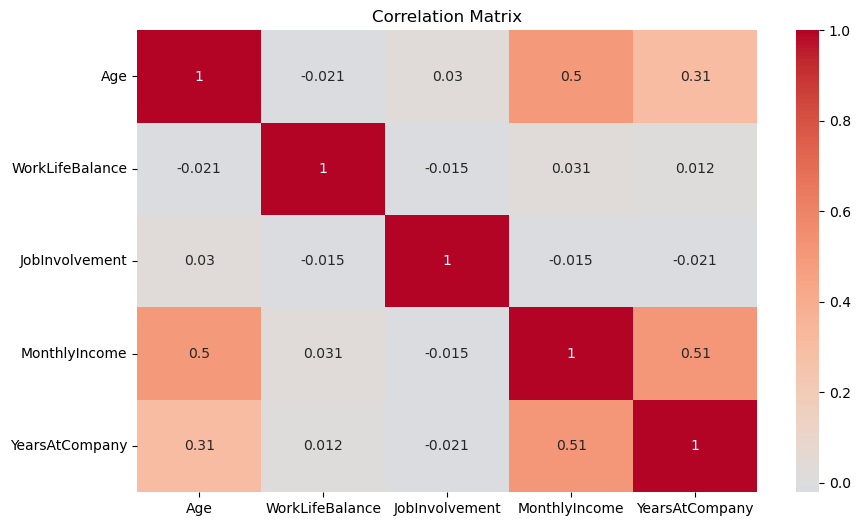

In [80]:
# Correlation matrix
corr_matrix = df[['Age', 'WorkLifeBalance', 'JobInvolvement', 'MonthlyIncome', 'YearsAtCompany']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

<h1> Department Analysis </h1>

In [26]:
df.groupby('Department')['EmployeeCount'].sum()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: EmployeeCount, dtype: int64

(array([], dtype=float64), [])

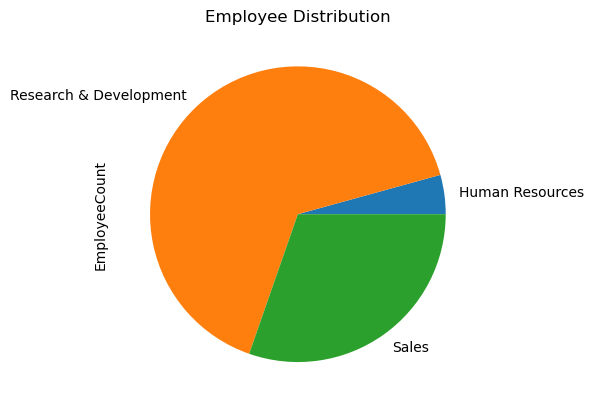

In [68]:
dept= df.groupby('Department')['EmployeeCount'].sum().plot(kind='pie', title='Employee Distribution')
plt.xticks(rotation=0)

In [32]:
df.groupby('Department')['JobSatisfaction'].value_counts()

Department              JobSatisfaction
Human Resources         2                   20
                        4                   17
                        3                   15
                        1                   11
Research & Development  3                  300
                        4                  295
                        1                  192
                        2                  174
Sales                   4                  147
                        3                  127
                        1                   86
                        2                   86
Name: JobSatisfaction, dtype: int64

In [37]:
df.groupby('Department')['Education'].value_counts()

Department              Education
Human Resources         3             27
                        4             15
                        2             13
                        1              5
                        5              3
Research & Development  3            379
                        4            255
                        2            182
                        1            115
                        5             30
Sales                   3            166
                        4            128
                        2             87
                        1             50
                        5             15
Name: Education, dtype: int64

In [34]:
df.groupby('Department')['MaritalStatus'].value_counts()

Department              MaritalStatus
Human Resources         Married           34
                        Divorced          16
                        Single            13
Research & Development  Married          433
                        Single           304
                        Divorced         224
Sales                   Married          206
                        Single           153
                        Divorced          87
Name: MaritalStatus, dtype: int64

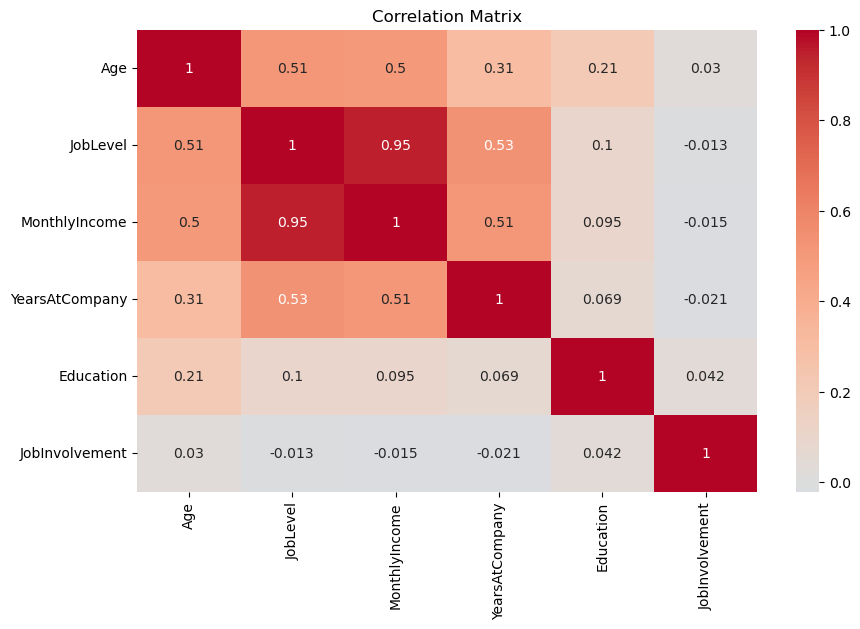

In [41]:
# Correlation matrix
corr_matrix = df[['Age', 'Department', 'JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'Education',
                 'JobInvolvement']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [44]:
df.groupby('Department')['PerformanceRating'].value_counts()

Department              PerformanceRating
Human Resources         3                     54
                        4                      9
Research & Development  3                    805
                        4                    156
Sales                   3                    385
                        4                     61
Name: PerformanceRating, dtype: int64

In [45]:
df.groupby('Department')['RelationshipSatisfaction'].value_counts()

Department              RelationshipSatisfaction
Human Resources         3                            24
                        4                            20
                        2                            11
                        1                             8
Research & Development  3                           298
                        4                           278
                        2                           212
                        1                           173
Sales                   3                           137
                        4                           134
                        1                            95
                        2                            80
Name: RelationshipSatisfaction, dtype: int64

<h1> Distance From Home Analysis </h1>

In [52]:
df.groupby('DistanceFromHome')['EmployeeCount'].sum()

DistanceFromHome
1     208
2     211
3      84
4      64
5      65
6      59
7      84
8      80
9      85
10     86
11     29
12     20
13     19
14     21
15     26
16     32
17     20
18     26
19     22
20     25
21     18
22     19
23     27
24     28
25     25
26     25
27     12
28     23
29     27
Name: EmployeeCount, dtype: int64

In [54]:
df.groupby('DistanceFromHome')['JobSatisfaction'].value_counts()

DistanceFromHome  JobSatisfaction
1                 4                  68
                  3                  58
                  1                  49
                  2                  33
2                 4                  78
                                     ..
28                2                   3
29                4                   9
                  3                   8
                  2                   6
                  1                   4
Name: JobSatisfaction, Length: 116, dtype: int64

<h1> Education Analysis </h1>

In [57]:
df.groupby('Education')['EmployeeCount'].sum()

Education
1    170
2    282
3    572
4    398
5     48
Name: EmployeeCount, dtype: int64

In [63]:
df.groupby('JobRole')['EducationField'].value_counts()

JobRole                    EducationField  
Healthcare Representative  Life Sciences        60
                           Medical              48
                           Technical Degree     14
                           Other                 9
Human Resources            Human Resources      21
                           Life Sciences        13
                           Medical              11
                           Technical Degree      4
                           Other                 3
Laboratory Technician      Life Sciences       119
                           Medical              99
                           Other                22
                           Technical Degree     19
Manager                    Life Sciences        40
                           Medical              32
                           Marketing            14
                           Human Resources       6
                           Other                 5
                           Technical D

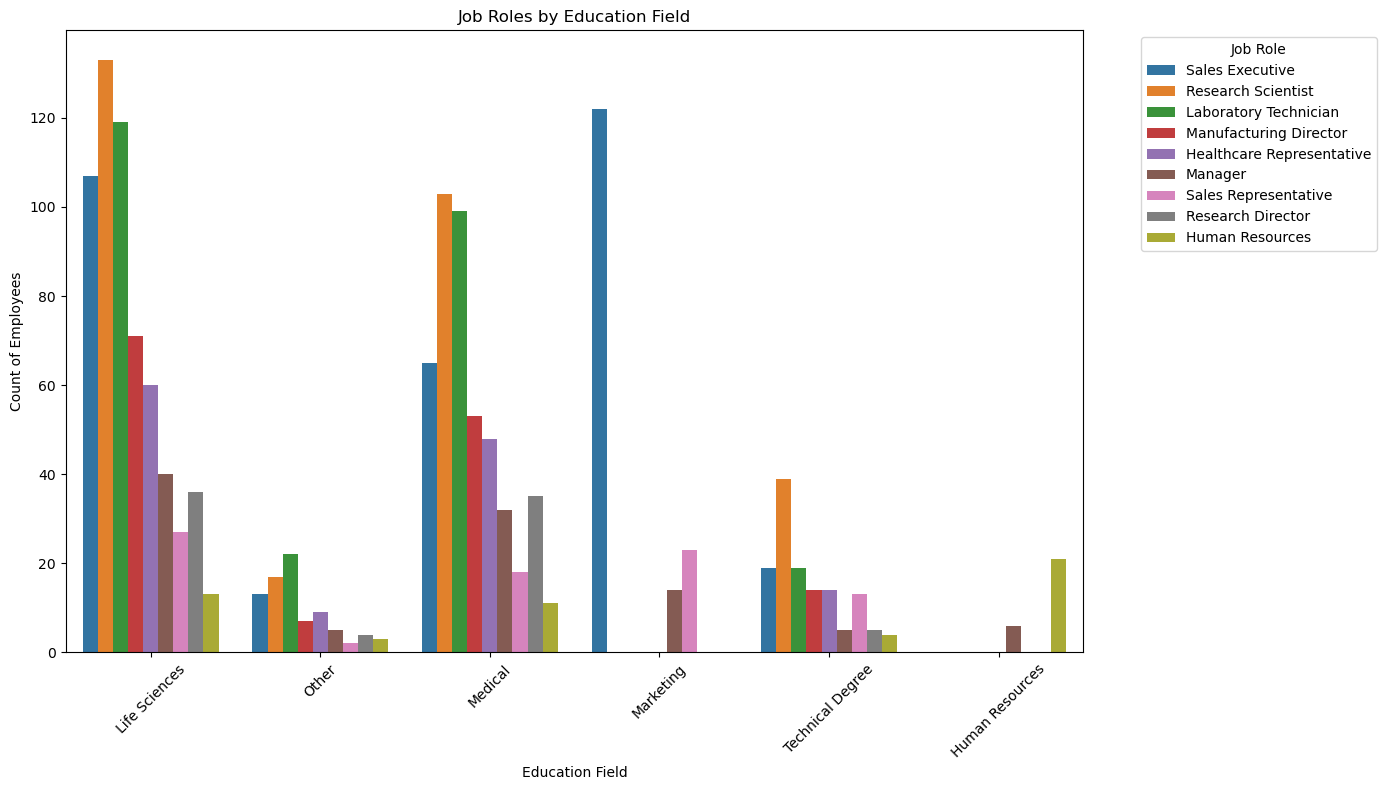

In [61]:
plt.figure(figsize=(14, 8))
sns.countplot(x ='EducationField', hue = "JobRole", data = df)
plt.title('Job Roles by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()